In [2]:
import numpy as np

def calculate_square_vertices(drone_x, drone_y, drone_height, coverage_angle):
    # Convert coverage angle from degrees to radians
    coverage_angle_rad = np.radians(coverage_angle)
    
    # Calculate the side length of the square coverage area
    side_length = 2 * drone_height * np.tan(coverage_angle_rad / 2)
    
    # Calculate the half side length
    half_side = side_length / 2
    
    # Calculate the coordinates of the vertices of the square
    vertices = np.array([
        [drone_x - half_side, drone_y - half_side],  # Bottom-left
        [drone_x - half_side, drone_y + half_side],  # Top-left
        [drone_x + half_side, drone_y + half_side],  # Top-right
        [drone_x + half_side, drone_y - half_side]   # Bottom-right
    ])
    
    return vertices

# Example usage
drone_x = 100  # drone's x position
drone_y = 50   # drone's y position
drone_height = 10  # meters
coverage_angle = 45  # degrees

vertices = calculate_square_vertices(drone_x, drone_y, drone_height, coverage_angle)
print("Square Vertices:")
print(vertices)

Square Vertices:
[[ 95.85786438  45.85786438]
 [ 95.85786438  54.14213562]
 [104.14213562  54.14213562]
 [104.14213562  45.85786438]]


In [ ]:
def parallel_lines(polygon, perpendicular_dt):
    

C:\Users\samue\AppData\Local\Temp\ipykernel_33796\558766.py:41: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if intersection.type == 'MultiPoint':
C:\Users\samue\AppData\Local\Temp\ipykernel_33796\558766.py:43: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  elif intersection.type == 'Point':


TypeError: 'MultiPoint' object is not iterable

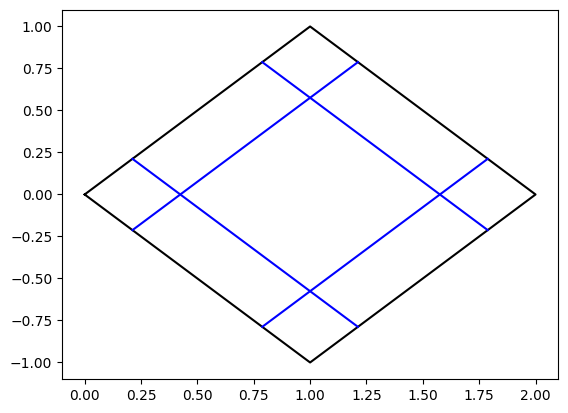

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Polygon, LineString, MultiPoint

def plot_polygon(polygon, ax=None):
    x, y = polygon.exterior.xy
    if ax is None:
        ax = plt.gca()
    ax.plot(x, y, color='black')

def plot_line(line, ax=None):
    x, y = line.xy
    if ax is None:
        ax = plt.gca()
    ax.plot(x, y, color='blue')

def plot_points(points, ax=None):
    x, y = zip(*[(p.x, p.y) for p in points])
    if ax is None:
        ax = plt.gca()
    ax.plot(x, y, 'ro')

def parallel_lines(polygon, distance):
    lines = []
    vertices = np.array(polygon.exterior.coords)
    for i in range(len(vertices) - 1):
        p1 = vertices[i]
        p2 = vertices[i + 1]
        dx, dy = p2 - p1
        length = np.sqrt(dx ** 2 + dy ** 2)
        nx, ny = dy / length, -dx / length  # Normal vector
        parallel_point1 = p1 + np.array([nx, ny]) * distance
        parallel_point2 = p2 + np.array([nx, ny]) * distance
        lines.append(LineString([parallel_point1, parallel_point2]))
    return lines

def intersection_points(polygon, lines):
    intersection_pts = []
    for line in lines:
        intersection = line.intersection(polygon)
        if intersection.type == 'MultiPoint':
            intersection_pts.extend(intersection)
        elif intersection.type == 'Point':
            intersection_pts.append(intersection)
    return MultiPoint(intersection_pts)

# Define the polygon
polygon = Polygon([(0, 0), (1, 1), (2, 0), (1, -1)])

# Define distance between parallel lines
distance = 0.3

# Generate parallel lines
lines = parallel_lines(polygon, distance)

# Find intersection points
intersection_pts = intersection_points(polygon, lines)

# Plotting
fig, ax = plt.subplots()
plot_polygon(polygon, ax)
for line in lines:
    plot_line(line, ax)
plot_points(intersection_pts, ax)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Polygon with Parallel Lines and Intersection Points')
plt.grid(True)
plt.show()

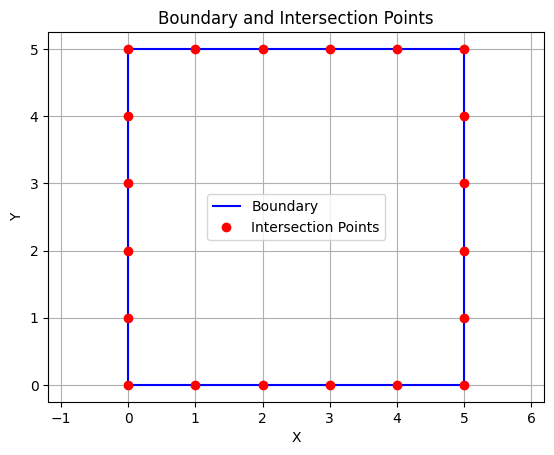

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def intersect_parallel_lines(boundary_points, dl):
    """
    Function to find intersection points of parallel lines with a boundary.

    Parameters:
        boundary_points (list of tuples): List of boundary points as (x, y) tuples.
        dl (float): Spacing between parallel lines.

    Returns:
        list of tuples: Intersection points as (x, y) tuples.
    """
    intersection_points = []

    # Iterate through each line segment defined by consecutive boundary points
    for i in range(len(boundary_points) - 1):
        p1 = boundary_points[i]
        p2 = boundary_points[i + 1]

        # Calculate the direction vector of the line segment
        dx = p2[0] - p1[0]
        dy = p2[1] - p1[1]

        # Calculate the length of the line segment
        length = np.sqrt(dx**2 + dy**2)

        # Calculate the unit direction vector
        ux = dx / length
        uy = dy / length

        # Calculate the number of parallel lines needed to cover the line segment
        num_lines = int(length / dl)

        # Calculate the increment in x and y for each parallel line
        increment_x = dl * ux
        increment_y = dl * uy

        # Starting point for the first parallel line
        current_point = p1

        # Iterate through each parallel line
        for j in range(num_lines):
            # Add the current point to the intersection points list
            intersection_points.append(current_point)

            # Move to the next point along the direction vector
            current_point = (current_point[0] + increment_x, current_point[1] + increment_y)

    return intersection_points

# Example boundary points
boundary_points = [(0, 0), (5, 0), (5, 5), (0, 5), (0, 0)]

# Spacing between parallel lines
dl = 1.0

# Calculate intersection points
intersection_points = intersect_parallel_lines(boundary_points, dl)

# Extract x and y coordinates of boundary and intersection points
boundary_x, boundary_y = zip(*boundary_points)
intersection_x, intersection_y = zip(*intersection_points)

# Plot the boundary and intersection points
plt.plot(boundary_x, boundary_y, 'b-', label='Boundary')
plt.plot(intersection_x, intersection_y, 'ro', label='Intersection Points')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Boundary and Intersection Points')
plt.legend()
plt.grid(True)
plt.axis('equal')  # Equal scaling
plt.show()


Shortest path: [0, 1, 2, 4, 3, 0]
Drone segments: [[0, 1, 4], [2, 3, 0]]


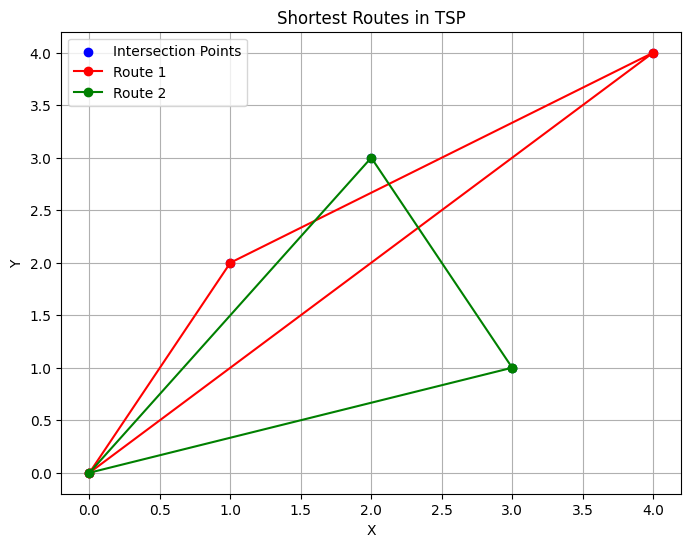

In [12]:
import networkx as nx
import matplotlib.pyplot as plt

def find_shortest_path(intersection_points):
    # Create a complete graph with intersection points as nodes
    G = nx.Graph()
    G.add_nodes_from(range(len(intersection_points)))
    
    # Calculate distances between each pair of points
    for i in range(len(intersection_points)):
        for j in range(i+1, len(intersection_points)):
            distance = calculate_distance(intersection_points[i], intersection_points[j])
            G.add_edge(i, j, weight=distance)
    
    # Solve the TSP using the held-karp algorithm
    tsp_path = nx.approximation.traveling_salesman_problem(G)
    return tsp_path

def calculate_distance(point1, point2):
    # Calculate Euclidean distance between two points
    return ((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2) ** 0.5

def distribute_points_among_drones(tsp_path, num_drones):
    # Initialize empty segments for each drone
    drone_segments = [[] for _ in range(num_drones)]
    total_distances = [0] * num_drones
    
    # Assign points to drones alternatingly
    for i, point_index in enumerate(tsp_path):
        min_index = min(range(num_drones), key=lambda j: total_distances[j])
        drone_segments[min_index].append(point_index)
        if i > 0:
            total_distances[min_index] += calculate_distance(intersection_points[tsp_path[i-1]], intersection_points[point_index])
    
    return drone_segments

# Example usage:
intersection_points = [(0, 0), (1, 2), (3, 1), (2, 3), (4, 4)]
num_drones = 2

# Find shortest path
shortest_path = find_shortest_path(intersection_points)

# Distribute points among drones
drone_segments = distribute_points_among_drones(shortest_path, num_drones)

print("Shortest path:", shortest_path)
print("Drone segments:", drone_segments)

# Plot the points and routes
plt.figure(figsize=(8, 6))

# Plot points
plt.scatter(*zip(*intersection_points), color='blue', label='Intersection Points')

# Plot routes
colors = ['red', 'green']  # Define colors for the routes
for i, segment in enumerate(drone_segments):
    route_points = [intersection_points[j] for j in segment]  # Extract points in the route order
    route_points.append(intersection_points[segment[0]])  # Return to starting point to complete the loop
    route_x, route_y = zip(*route_points)
    plt.plot(route_x, route_y, color=colors[i], linestyle='-', marker='o', label=f'Route {i+1}')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Shortest Routes in TSP')
plt.legend()
plt.grid(True)


In [7]:
from shapely.geometry import LineString, Polygon, Point

# Define polygon vertices
polygon_vertices = [(1, 1), (4, 2), (3, 5), (1, 4)]
polygon = Polygon(polygon_vertices)

# Define interval between parallel lines
interval = 1

# Iterate through the polygon edges
for i in range(len(polygon_vertices)):
    # Define current edge of the polygon
    edge_start = polygon_vertices[i]
    edge_end = polygon_vertices[(i + 1) % len(polygon_vertices)]

    # Calculate the direction vector of the edge
    edge_vector = (edge_end[0] - edge_start[0], edge_end[1] - edge_start[1])

    # Create a LineString object representing the current edge
    edge_line = LineString([edge_start, edge_end])

    # Iterate through parallel lines
    for y in range(int(min(edge_start[1], edge_end[1])), int(max(edge_start[1], edge_end[1])), interval):
        # Create the parallel line
        parallel_line = LineString([(edge_start[0], y), (edge_end[0], y)])

        # Check if the parallel line intersects with the edge
        intersection = edge_line.intersection(parallel_line)
        if intersection.is_empty:
            continue

        # Check if the intersection point is within the segment
        if intersection.geom_type == 'Point' and edge_line.distance(intersection) < 1e-6:
            print(f"Intersection point: {intersection}")

Intersection point: POINT (1 1)
Intersection point: POINT (4 2)
Intersection point: POINT (3.6666666666666665 3)
Intersection point: POINT (3.3333333333333335 4)
Intersection point: POINT (1 4)


In [21]:
from shapely.geometry import Polygon, MultiPolygon
import numpy as np

def decompose_polygon_equal_areas(polygon, num_subpolygons):
    # Calculate the total area of the polygon
    total_area = polygon.area
    
    # Calculate the target area for each sub-polygon
    target_area = total_area / num_subpolygons
    
    # Convert the polygon into a MultiPolygon with one initial polygon
    multi_polygon = MultiPolygon([polygon])
    
    # Decompose the polygon into smaller sub-polygons
    subpolygons = []
    for _ in range(num_subpolygons):
        # Use a binary search to find a sub-polygon with approximately the target area
        min_area = 0
        max_area = total_area
        while max_area - min_area > 1e-6:
            # Calculate the mid-point of the search interval
            mid_area = (min_area + max_area) / 2
            
            # Extract a sub-polygon with the given area
            sub_polygon = multi_polygon.buffer(-mid_area)
            
            # Check if the area of the sub-polygon is close enough to the target area
            if np.isclose(sub_polygon.area, target_area, atol=1e-6):
                break
            elif sub_polygon.area > target_area:
                min_area = mid_area
            else:
                max_area = mid_area
                
        # Add the sub-polygon to the list of decomposed sub-polygons
        subpolygons.append(sub_polygon)
        
        # Update the remaining area for the next iteration
        total_area -= sub_polygon.area
        
        # Update the MultiPolygon by removing the current sub-polygon
        multi_polygon = multi_polygon.difference(sub_polygon)
        
    return subpolygons

# Example usage
polygon = Polygon([(0, 0), (4, 0), (4, 3), (1, 4)])
num_subpolygons = 4
subpolygons = decompose_polygon_equal_areas(polygon, num_subpolygons)

# Print the areas of the decomposed sub-polygons
for i, subpolygon in enumerate(subpolygons):
    print(subpolygon)
    print(f"Area of Sub-polygon {i+1}: {subpolygon.area}")

POLYGON ((1.120705005918704 0.8750200271606445, 1.6197187465732676 2.8710749897788994, 3.1249799728393555 2.3693212476902032, 3.1249799728393555 0.8750200271606445, 1.120705005918704 0.8750200271606445))
Area of Sub-polygon 1: 3.1249783408993705
POLYGON ((1.209300249079186 3.6187233529120557, 3.704475763164046 2.7869981815504357, 3.704475763164046 0.2955242368359541, 0.3785004700601605 0.2955242368359541, 1.209300249079186 3.6187233529120557), (3.1249799728393555 0.5794957903246905, 3.1539464134320916 0.5809188203000459, 3.1826338913672525 0.5851742056695426, 3.2107661305501516 0.5922209647458418, 3.238072202138812 0.6019912333868884, 3.2642891337368174 0.6143909185646972, 3.2891644419612467 0.6293006045326482, 3.3124585639956714 0.6465767028644068, 3.333947164711038 0.6660528352889621, 3.3534232971355933 0.6875414360043286, 3.370699395467352 0.7108355580387534, 3.3856090814353026 0.7357108662631825, 3.3980087666131116 0.7619277978611879, 3.4077790352541584 0.7892338694498483, 3.414825

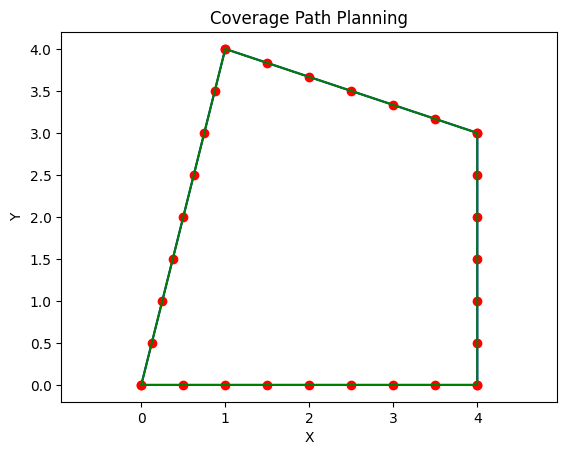

In [23]:
import matplotlib.pyplot as plt
from shapely.geometry import Polygon, LineString, Point
import numpy as np

def boustrophedon_sweep(polygon, step_size):
    coverage_path = []
    
    # Extract the exterior coordinates of the polygon
    exterior_coords = polygon.exterior.coords[:]
    
    # Iterate through the exterior coordinates
    for i in range(len(exterior_coords) - 1):
        v1 = exterior_coords[i]
        v2 = exterior_coords[i + 1]
        
        # Create a LineString segment between consecutive vertices
        segment = LineString([v1, v2])
        
        # Calculate the length of the segment
        segment_length = segment.length
        
        # Calculate the number of steps needed to cover the segment
        num_steps = int(segment_length / step_size)
        
        # Calculate the step size along the segment
        dx = (v2[0] - v1[0]) / num_steps
        dy = (v2[1] - v1[1]) / num_steps
        
        # Iterate along the segment and add waypoints to the coverage path
        for j in range(num_steps):
            x = v1[0] + j * dx
            y = v1[1] + j * dy
            
            # Add waypoint to the coverage path
            coverage_path.append(Point(x, y))
        
        # Add the end vertex of the segment to the coverage path
        coverage_path.append(Point(v2))
    
    return coverage_path

def plot_coverage_path(polygon, coverage_path):
    # Plot the polygon and coverage path
    fig, ax = plt.subplots()
    x, y = polygon.exterior.xy
    ax.plot(x, y, color='blue')

    for point in coverage_path:
        ax.plot(point.x, point.y, 'ro')

    # Connect waypoints to form the coverage path
    coverage_line = LineString(coverage_path)
    x_line, y_line = coverage_line.xy
    ax.plot(x_line, y_line, color='green')

    # Set axis labels and title
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title('Coverage Path Planning')

    # Show the plot
    plt.axis('equal')
    plt.show()

# Example usage
polygon = Polygon([(0, 0), (4, 0), (4, 3), (1, 4)])
step_size = 0.5
coverage_path = boustrophedon_sweep(polygon, step_size)
plot_coverage_path(polygon, coverage_path)

In [25]:
from shapely.geometry import Polygon
import numpy as np

def antipodal_pairs(polygon):
    # Ensure the polygon is convex
    convex_hull = polygon.convex_hull
    if not polygon.equals(convex_hull):
        raise ValueError("Polygon must be convex")

    # Get coordinates of the convex hull
    points = np.array(convex_hull.exterior.coords)

    # Initialize variables to store antipodal pairs and maximum distance
    antipodal_pairs = []
    max_distance = -1

    # Initialize indices for the first and second calipers
    i = 0
    j = 1

    # Iterate through each point of the convex hull
    while True:
        # Compute the distance between the current pair of points
        distance = np.linalg.norm(points[i] - points[j])

        # Update maximum distance and antipodal pairs if the computed distance is greater
        if distance > max_distance:
            max_distance = distance
            antipodal_pairs = [(i, j)]
        elif distance == max_distance:
            antipodal_pairs.append((i, j))

        # Move the calipers to the next pair of points
        i_next = (i + 1) % len(points)
        j_next = (j + 1) % len(points)

        # Check if rotating the calipers further increases the angle
        if np.cross(points[j_next] - points[i], points[j] - points[i]) < 0:
            j = j_next
        else:
            i = i_next

        # If the calipers complete a full rotation, break the loop
        if i == 0 and j == 1:
            break

    return antipodal_pairs, max_distance

# Example usage:
# Define your polygon vertices
polygon_coords = [(0, 0), (0, 3), (2, 5), (5, 3), (5, 0)]

# Create a Shapely Polygon object
polygon = Polygon(polygon_coords)

# Compute antipodal pairs
antipodal_pairs, max_distance = antipodal_pairs(polygon)

print("Antipodal Pairs:", antipodal_pairs)
print("Maximum Antipodal Distance:", max_distance)


Antipodal Pairs: [(4, 1)]
Maximum Antipodal Distance: 5.830951894845301


In [18]:
def RCPP(points):
    # Sort points by x-coordinate and y-coordinate separately
    points_sorted_by_x = sorted(points, key=lambda p: p[0])
    points_sorted_by_y = sorted(points, key=lambda p: p[1])

    # Initialize the rectilinear convex hull
    leftmost_point = points_sorted_by_x[0]
    rightmost_point = points_sorted_by_x[-1]
    bottom_point = points_sorted_by_y[0]
    top_point = points_sorted_by_y[-1]
    
    rectilinear_convex_hull = (leftmost_point[0], bottom_point[1], rightmost_point[0], top_point[1])

    # Scan along the x-axis
    for point in points_sorted_by_x:
        if point[0] > rightmost_point[0]:
            rightmost_point = point
            rectilinear_convex_hull = (leftmost_point[0], bottom_point[1], rightmost_point[0], top_point[1])

    # Scan along the y-axis
    for point in points_sorted_by_y:
        if point[1] > top_point[1]:
            top_point = point
            rectilinear_convex_hull = (leftmost_point[0], bottom_point[1], rightmost_point[0], top_point[1])

    return rectilinear_convex_hull

# Example usage
points = [(1, 1), (2, 3), (4, 2), (5, 5), (7, 4), (8, 6), (9, 3)]
result = RCPP(points)
print("Rectilinear Convex Hull:", result)

Rectilinear Convex Hull: (1, 1, 9, 6)


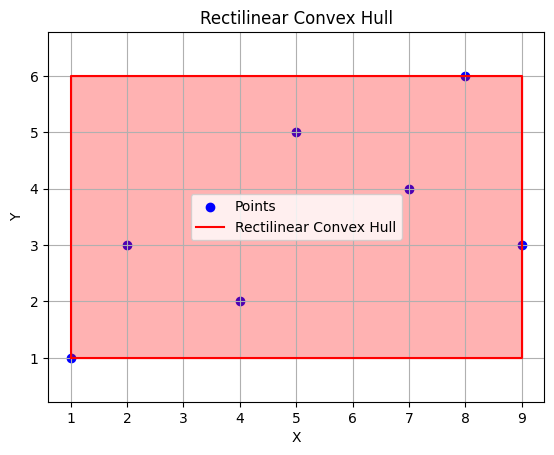

In [19]:
import matplotlib.pyplot as plt

def plot_rectilinear_convex_hull(rectilinear_convex_hull, points):
    # Extract coordinates of the hull
    x1, y1, x2, y2 = rectilinear_convex_hull
    x_values = [x1, x2, x2, x1, x1]
    y_values = [y1, y1, y2, y2, y1]

    # Plot the points
    x_points, y_points = zip(*points)
    plt.scatter(x_points, y_points, color='blue', label='Points')

    # Plot the rectilinear convex hull
    plt.plot(x_values, y_values, color='red', label='Rectilinear Convex Hull')
    plt.fill(x_values, y_values, color='red', alpha=0.3)

    # Set axis labels and title
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Rectilinear Convex Hull')

    # Add legend
    plt.legend()

    # Show the plot
    plt.grid(True)
    plt.axis('equal')
    plt.show()

# Example usage
points = [(1, 1), (2, 3), (4, 2), (5, 5), (7, 4), (8, 6), (9, 3)]
rectilinear_convex_hull = RCPP(points)
plot_rectilinear_convex_hull(rectilinear_convex_hull, points)

In [20]:
def intersection_points(outer_polygon, perpendicular_distance):
    boundary_points = np.array(boundary_polygon.exterior)
    intersection_points = list()
    
    for i in range(len(boundary_points) - 1):
        # definind the line segment points
        p1, p2 = boundary_points[i:i+2]

        # calculate the direction vector ux and uy
        dx, dy = p2[0] - p1[0], p2[1] - p1[1]
        length = np.sqrt(dx**2 + dy**2)
        ux, uy = dx / length, dy / length
        
        # calculates the number of lines needed based on drone coverage
        num_lines = int(length / dl)
        increment_x, increment_y = dl * ux, dl * uy
        current_point = p1

        intersection_points.extend([current_point := (current_point[0] + increment_x, current_point[1] + increment_y) for _ in range(num_lines)])

    return intersection_points
    
    

In [ ]:
import networkx as nx

def shortest_path(intersection_points):
    """calculates the shortest path for the drones to take

    Args:
        intersection_points (list of coordinates): x, y values
    """
    def calculate_distance(point1, point2):
        """calculates the shortest distance from one point to another

        Args:
            point1 (tuple): x, y coordinates
            point2 (tuple): x, y coordinates

        Returns:
            : _description_
        """
    # Calculate Euclidean distance between two points
        return ((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2) ** 0.5

    # Create a complete graph with intersection points as nodes
    G = nx.Graph()
    G.add_nodes_from(range(len(intersection_points)))
    
    # Calculate distances between each pair of points
    for i in range(len(intersection_points)):
        for j in range(i+1, len(intersection_points)):
            distance = calculate_distance(intersection_points[i], intersection_points[j])
            G.add_edge(i, j, weight=distance)
    
    # Solve the TSP using the held-karp algorithm
    tsp_path = nx.approximation.traveling_salesman_problem(G)
    return tsp_path

In [5]:
import fields2cover as f2c

ring = f2c.LinearRing()
[ring.addPoint(p) for p in [f2c.Point(1,1), f2c.Point(1,2), f2c.Point(2,2), f2c.Point(1,1)]]
print("Area of the ring: ", ring.getArea())

Area of the ring:  0.5


In [2]:
from shapely.geometry import Polygon

# Define the coordinates of the vertices of the polygon
polygon_coords = [(0, 0), (0, 1), (1, 1), (1, 0)]

# Create a Polygon object using the coordinates
polygon = Polygon(polygon_coords)

# Get the coordinates of the vertices
vertices_coords = polygon.exterior.coords

# Print the coordinates of the vertices
for vertex in vertices_coords:
    print(vertex)

(0.0, 0.0)
(0.0, 1.0)
(1.0, 1.0)
(1.0, 0.0)
(0.0, 0.0)


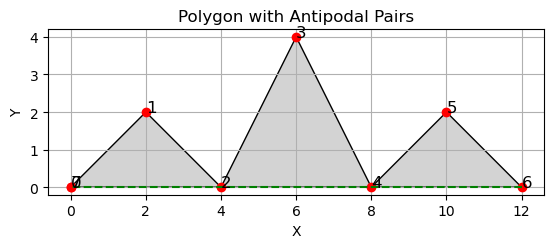

In [2]:
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon as MatplotlibPolygon
from matplotlib.lines import Line2D

def plot_polygon_with_antipodal_pairs(polygon, antipodal_pairs):
    # Extract coordinates of the polygon
    polygon_coords = list(polygon.exterior.coords)

    # Plot the polygon
    fig, ax = plt.subplots()
    polygon_patch = MatplotlibPolygon(polygon_coords, closed=True, edgecolor='black', facecolor='lightgray')
    ax.add_patch(polygon_patch)

    # Plot the vertices
    for i, vertex in enumerate(polygon_coords):
        ax.plot(vertex[0], vertex[1], 'ro')
        ax.text(vertex[0], vertex[1], f'{i}', fontsize=12)

    # Plot the antipodal pairs
    for pair in antipodal_pairs:
        i, j = pair
        ax.plot([polygon_coords[i][0], polygon_coords[j][0]], [polygon_coords[i][1], polygon_coords[j][1]], 'g--')

    # Set axis labels and aspect ratio
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_aspect('equal', adjustable='box')

    plt.title('Polygon with Antipodal Pairs')
    plt.grid(True)
    plt.show()

# Example usage:
polygon_coords = [(0, 0), (2, 2), (4, 0), (6, 4), (8, 0), (10, 2), (12, 0)]
polygon = Polygon(polygon_coords)
pairs = antipodal_pairs(polygon)

# Plot the polygon with antipodal pairs
plot_polygon_with_antipodal_pairs(polygon, pairs)

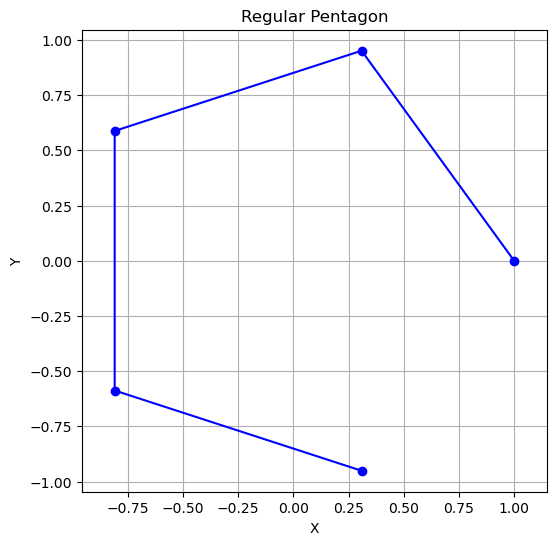

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Define the coordinates of the regular pentagon
center = (0, 0)  # Center of the pentagon
radius = 1  # Radius of the circumcircle
num_sides = 5
theta = np.linspace(0, 2*np.pi, num_sides+1)[:-1]  # Angles for each vertex

# Calculate the coordinates of the vertices
x_coords = center[0] + radius * np.cos(theta)
y_coords = center[1] + radius * np.sin(theta)

# Plot the polygon
plt.figure(figsize=(6, 6))
plt.plot(x_coords, y_coords, '-o', color='b')
plt.title('Regular Pentagon')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.axis('equal')
plt.show()

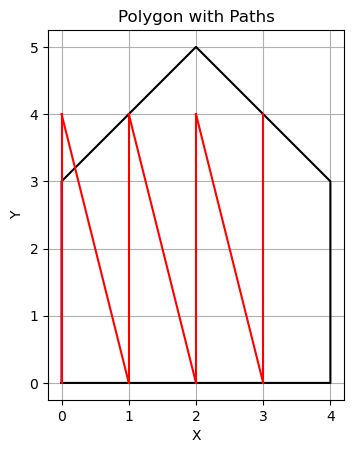

In [2]:
import matplotlib.pyplot as plt
from shapely.geometry import Polygon, Point, LineString
import numpy as np

def generate_paths_to_cover_polygon(polygon, path_distance):
    # Ensure the input is a Polygon
    if not isinstance(polygon, Polygon):
        raise ValueError("Input must be a Shapely Polygon")

    # Determine the bounding box of the polygon
    min_x, min_y, max_x, max_y = polygon.bounds

    # Generate grid points with the specified path distance
    x_points = np.arange(min_x, max_x, path_distance)
    y_points = np.arange(min_y, max_y, path_distance)
    grid_points = [(x, y) for x in x_points for y in y_points]

    # Create paths by connecting adjacent grid points inside the polygon
    paths = []
    for i in range(len(grid_points)):
        for j in range(i + 1, len(grid_points)):
            point1, point2 = grid_points[i], grid_points[j]
            if LineString([point1, point2]).intersects(polygon):
                paths.append((point1, point2))
                break

    return paths

# Example usage:
polygon_coords = [(0, 0), (4, 0), (4, 3), (2, 5), (0, 3)]
polygon = Polygon(polygon_coords)
paths = generate_paths_to_cover_polygon(polygon, 1.0)

# Plot the polygon and paths
fig, ax = plt.subplots()
ax.plot(*polygon.exterior.xy, color='black')
for path in paths:
    ax.plot(*LineString(path).xy, color='red')
ax.set_aspect('equal')
plt.title('Polygon with Paths')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Polygon, Point
from shapely.ops import cascaded_union

# Define the polygon
polygon_coords = [(0, 0), (4, 0), (4, 3), (2, 5), (0, 3)]
polygon = Polygon(polygon_coords)

# Define the grid parameters
cell_size = 0.5  # Size of each grid cell
fov = 1.0  # Field of view of the drone
drone_speed = 1.0  # Speed of the drone (grid cells per second)

# Create a grid covering the polygon
min_x, min_y, max_x, max_y = polygon.bounds
grid_x = np.arange(min_x, max_x + cell_size, cell_size)
grid_y = np.arange(min_y, max_y + cell_size, cell_size)
grid = [(x, y) for x in grid_x for y in grid_y]

# Find the centroids of each grid cell
centroids = []
for x in grid_x[:-1]:
    for y in grid_y[:-1]:
        centroid = Point(x + cell_size / 2, y + cell_size / 2)
        if centroid.within(polygon):
            centroids.append(centroid)

# Define a coverage path planning algorithm (simple raster scan)
def coverage_path_planning(centroids):
    return centroids  # Return centroids as the coverage path (simple raster scan)

# Implement obstacle avoidance (simple avoidance strategy)
def obstacle_avoidance(current_position, next_position, obstacles):
    # Check if the next position is within any obstacle
    for obstacle in obstacles:
        if next_position.within(obstacle):
            # Move away from the obstacle (for simplicity, move to the nearest non-obstacle centroid)
            distances = [current_position.distance(c) for c in centroids if not c.within(obstacle)]
            nearest_centroid = centroids[np.argmin(distances)]
            return nearest_centroid
    return next_position

# Coverage path planning
coverage_path = coverage_path_planning(centroids)

# Simulation parameters
drone_position = centroids[0]  # Start at the first centroid
obstacles = [polygon]  # In this simple example, the polygon itself is considered an obstacle

# Simulation loop
covered_area = []
for target_position in coverage_path:
    # Move towards the target position while avoiding obstacles
    while drone_position != target_position:
        # Calculate the direction towards the target
        direction = Point(target_position.x - drone_position.x, target_position.y - drone_position.y)
        direction = direction / direction.distance(Point(0, 0))  # Normalize direction vector

        # Calculate the next position based on the drone's speed
        next_position = Point(drone_position.x + direction.x * drone_speed,
                              drone_position.y + direction.y * drone_speed)

        # Perform obstacle avoidance
        next_position = obstacle_avoidance(drone_position, next_position, obstacles)

        # Update drone position
        drone_position = next_position

        # Record covered area
        covered_area.append(drone_position)

# Plot the polygon and drone path
fig, ax = plt.subplots()
ax.plot(*polygon.exterior.xy, color='black', label='Polygon')
ax.plot(*zip(*covered_area), color='red', marker='o', markersize=3, label='Drone Path')
ax.set_aspect('equal')
ax.legend()
plt.title('Polygon Coverage Path with Drone')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()


TypeError: unsupported operand type(s) for /: 'Point' and 'float'

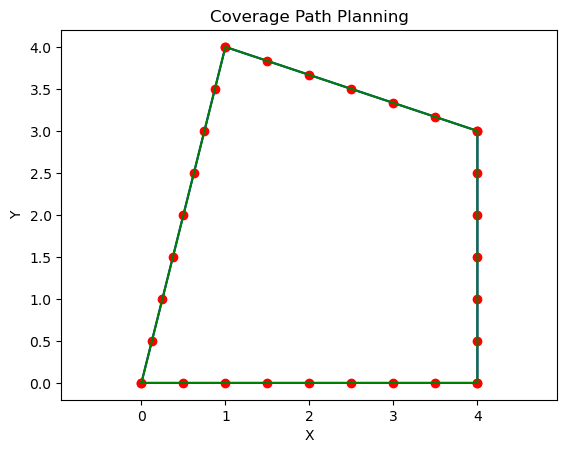

In [5]:
import matplotlib.pyplot as plt
from shapely.geometry import Polygon, LineString, Point
import numpy as np

def boustrophedon_sweep(polygon, step_size):
    coverage_path = []
    
    # Extract the exterior coordinates of the polygon
    exterior_coords = polygon.exterior.coords[:]
    
    # Iterate through the exterior coordinates
    for i in range(len(exterior_coords) - 1):
        v1 = exterior_coords[i]
        v2 = exterior_coords[i + 1]
        
        # Create a LineString segment between consecutive vertices
        segment = LineString([v1, v2])
        
        # Calculate the length of the segment
        segment_length = segment.length
        
        # Calculate the number of steps needed to cover the segment
        num_steps = int(segment_length / step_size)
        
        # Calculate the step size along the segment
        dx = (v2[0] - v1[0]) / num_steps
        dy = (v2[1] - v1[1]) / num_steps
        
        # Iterate along the segment and add waypoints to the coverage path
        for j in range(num_steps):
            x = v1[0] + j * dx
            y = v1[1] + j * dy
            
            # Add waypoint to the coverage path
            coverage_path.append(Point(x, y))
        
        # Add the end vertex of the segment to the coverage path
        coverage_path.append(Point(v2))
    
    return coverage_path

def plot_coverage_path(polygon, coverage_path):
    # Plot the polygon and coverage path
    fig, ax = plt.subplots()
    x, y = polygon.exterior.xy
    ax.plot(x, y, color='blue')

    for point in coverage_path:
        ax.plot(point.x, point.y, 'ro')

    # Connect waypoints to form the coverage path
    coverage_line = LineString(coverage_path)
    x_line, y_line = coverage_line.xy
    ax.plot(x_line, y_line, color='green')

    # Set axis labels and title
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title('Coverage Path Planning')

    # Show the plot
    plt.axis('equal')
    plt.show()

# Example usage
polygon = Polygon([(0, 0), (4, 0), (4, 3), (1, 4)])
step_size = 0.5
coverage_path = boustrophedon_sweep(polygon, step_size)
plot_coverage_path(polygon, coverage_path)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Polygon

def distribute_points_around_polygon(polygon, distance):
    # Extract the exterior coordinates of the polygon
    exterior_coords = np.array(polygon.exterior.coords)
    
    points = []
    total_length = polygon.length
    current_length = 0
    
    # Iterate through the exterior coordinates
    for i in range(len(exterior_coords) - 1):
        v1 = exterior_coords[i]
        v2 = exterior_coords[i + 1]
        
        # Calculate the length of the segment
        segment_length = np.linalg.norm(v2 - v1)
        
        # Calculate the number of points to distribute along the segment
        num_points = int(segment_length / distance)
        
        # Calculate the step size along the segment
        dx = (v2[0] - v1[0]) / num_points
        dy = (v2[1] - v1[1]) / num_points
        
        # Distribute points along the segment
        for j in range(num_points):
            x = v1[0] + j * dx
            y = v1[1] + j * dy
            
            points.append((x, y))
        
        # Update the current length
        current_length += segment_length
        
        # Check if we need to add points to bridge the gap to the next segment
        while current_length > len(points) * distance:
            remaining_length = current_length - len(points) * distance
            remaining_fraction = remaining_length / segment_length
            x = v1[0] + (num_points + remaining_fraction) * dx
            y = v1[1] + (num_points + remaining_fraction) * dy
            points.append((x, y))
    
    return points

# Example usage
polygon = Polygon([(0, 0), (4, 0), (4, 3), (1, 4)])
distance = 1.0
points = distribute_points_around_polygon(polygon, distance)

# Plot the polygon and distributed points
fig, ax = plt.subplots()
x, y = polygon.exterior.xy
ax.plot(x, y, color='blue')

for point in points:
    ax.plot(point[0], point[1], 'ro')

# Set axis labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Equally Distributed Points around the Polygon')

# Show the plot
plt.axis('equal')
plt.show()


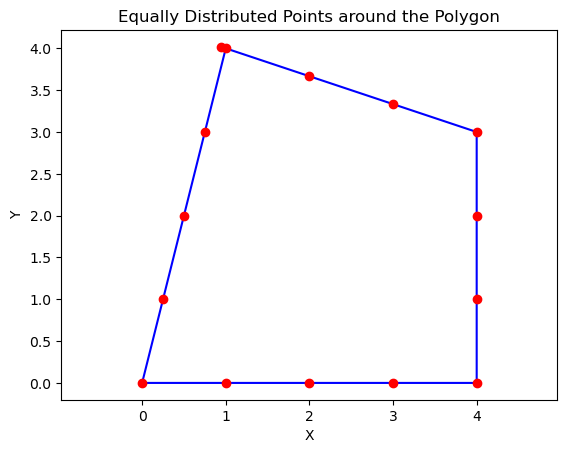

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Polygon

def distribute_points_around_polygon(polygon, distance):
    # Extract the exterior coordinates of the polygon
    exterior_coords = np.array(polygon.exterior.coords)
    
    points = []
    total_length = polygon.length
    current_length = 0
    
    # Iterate through the exterior coordinates
    for i in range(len(exterior_coords) - 1):
        v1 = exterior_coords[i]
        v2 = exterior_coords[i + 1]
        
        # Calculate the length of the segment
        segment_length = np.linalg.norm(v2 - v1)
        
        # Calculate the number of points to distribute along the segment
        num_points = int(segment_length / distance)
        
        # Calculate the step size along the segment
        dx = (v2[0] - v1[0]) / num_points
        dy = (v2[1] - v1[1]) / num_points
        
        # Distribute points along the segment
        for j in range(num_points):
            x = v1[0] + j * dx
            y = v1[1] + j * dy
            
            points.append((x, y))
        
        # Update the current length
        current_length += segment_length
        
        # Check if we need to add points to bridge the gap to the next segment
        while current_length > len(points) * distance:
            remaining_length = current_length - len(points) * distance
            remaining_fraction = remaining_length / segment_length
            x = v1[0] + (num_points + remaining_fraction) * dx
            y = v1[1] + (num_points + remaining_fraction) * dy
            points.append((x, y))
    
    return points

# Example usage
polygon = Polygon([(0, 0), (4, 0), (4, 3), (1, 4)])
distance = 1.0
points = distribute_points_around_polygon(polygon, distance)

# Plot the polygon and distributed points
fig, ax = plt.subplots()
x, y = polygon.exterior.xy
ax.plot(x, y, color='blue')

for point in points:
    ax.plot(point[0], point[1], 'ro')

# Set axis labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Equally Distributed Points around the Polygon')

# Show the plot
plt.axis('equal')
plt.show()


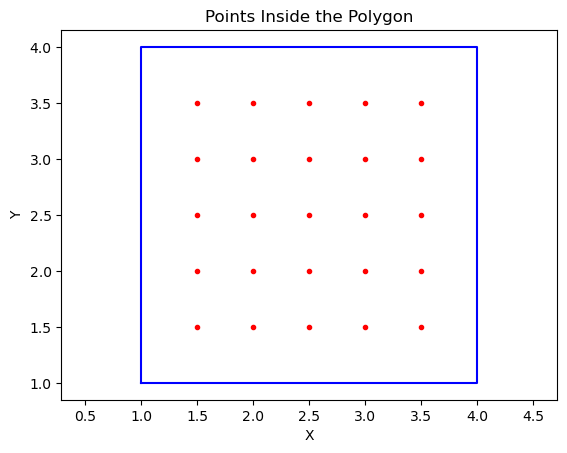

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Polygon, Point
from scipy.spatial import Voronoi, voronoi_plot_2d

def generate_points_inside_polygon(polygon, grid_size):
    # Calculate the bounding box of the polygon
    min_x, min_y, max_x, max_y = polygon.bounds
    
    # Generate grid points inside the bounding box
    grid_points = []
    for x in np.arange(min_x, max_x, grid_size):
        for y in np.arange(min_y, max_y, grid_size):
            point = Point(x, y)
            if polygon.contains(point):
                grid_points.append((x, y))
    
    return grid_points

# Example usage
polygon = Polygon([(1, 1), (4, 1), (4, 4), (1, 4)])
grid_size = 0.5
points_inside_polygon = generate_points_inside_polygon(polygon, grid_size)

# Plot the polygon and points inside
fig, ax = plt.subplots()
x, y = polygon.exterior.xy
ax.plot(x, y, color='blue')

for point in points_inside_polygon:
    ax.plot(point[0], point[1], 'ro', markersize=3)

# Set axis labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Points Inside the Polygon')

# Show the plot
plt.axis('equal')
plt.show()


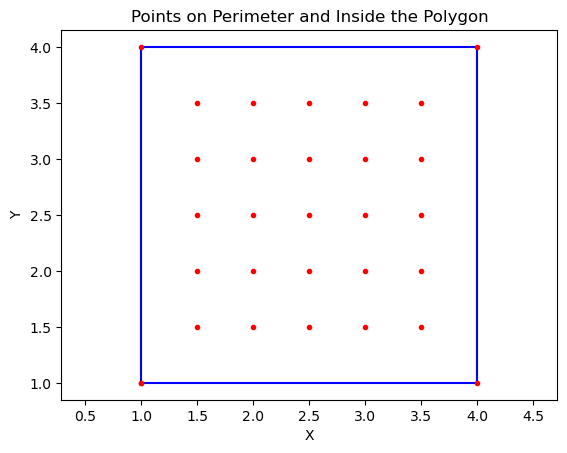

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Polygon, Point
from scipy.spatial import Voronoi, voronoi_plot_2d

def generate_points_on_perimeter_and_inside(polygon, perimeter_distance, grid_size):
    # Generate points on the perimeter
    perimeter_points = []
    for point in polygon.exterior.coords:
        perimeter_points.append(point)

    # Generate points inside the polygon using a grid-based approach
    min_x, min_y, max_x, max_y = polygon.bounds
    grid_points = []
    for x in np.arange(min_x, max_x, grid_size):
        for y in np.arange(min_y, max_y, grid_size):
            point = Point(x, y)
            if polygon.contains(point):
                grid_points.append((x, y))

    # Combine the lists of perimeter points and grid points
    points = perimeter_points + grid_points
    
    return points

# Example usage
polygon = Polygon([(1, 1), (4, 1), (4, 4), (1, 4)])
perimeter_distance = 0.5
grid_size = 0.5
points_on_perimeter_and_inside = generate_points_on_perimeter_and_inside(polygon, perimeter_distance, grid_size)

# Plot the polygon and points
fig, ax = plt.subplots()
x, y = polygon.exterior.xy
ax.plot(x, y, color='blue')

for point in points_on_perimeter_and_inside:
    ax.plot(point[0], point[1], 'ro', markersize=3)

# Set axis labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Points on Perimeter and Inside the Polygon')

# Show the plot
plt.axis('equal')
plt.show()


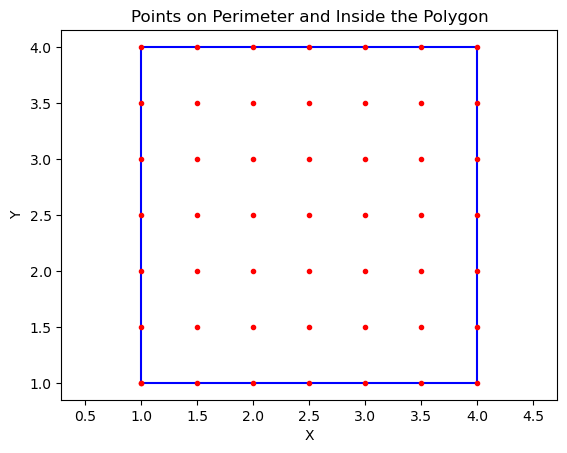

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Polygon, Point, LineString
def generate_points(polygon, grid_size, distance):
    """generates the points that the drone must hit

    Args:
        polygon (class): the polygon class
        grid_size (float): the size of the grid to determine the resolution of the plot points
        distance (float): the distance between the points
        
    Return:
        list: a list of x and y coordinates of the points
    """

    def generate_equidistant_points(polygon, distance):
        equidistant_points = []
        # Iterate through the exterior coordinates of the polygon
        for i in range(len(polygon.exterior.coords) - 1):
            # Get the start and end points of the line segment
            start_point = polygon.exterior.coords[i]
            end_point = polygon.exterior.coords[i + 1]
            
            # Create a LineString from the start and end points
            line = LineString([start_point, end_point])
            
            # Calculate the length of the line segment
            segment_length = line.length
            
            # Calculate the number of points to distribute along the line segment
            num_points = int(segment_length / distance)
            
            # Calculate the step size along the line segment
            step_size = segment_length / num_points
            
            # Iterate along the line segment and add equidistant points
            for j in range(num_points):
                # Interpolate a point along the line segment
                point = line.interpolate(j * step_size)
                equidistant_points.append(point.coords[0])
        
        # Add the last point of the polygon
        equidistant_points.append(polygon.exterior.coords[-1])
        
        return equidistant_points

    def generate_points_on_perimeter_and_inside(polygon, grid_size, distance):
        # Generate equidistant points along the perimeter
        equidistant_points = generate_equidistant_points(polygon, distance)
        
        # Generate points inside the polygon using a grid-based approach
        min_x, min_y, max_x, max_y = polygon.bounds
        grid_points = []
        for x in np.arange(min_x, max_x, grid_size):
            for y in np.arange(min_y, max_y, grid_size):
                point = Point(x, y)
                if polygon.contains(point):
                    grid_points.append((x, y))

        # Combine the lists of equidistant points and grid points
        points = equidistant_points + grid_points
        
        return points
    
    return generate_points_on_perimeter_and_inside(polygon, grid_size, distance)


# Example usage
polygon = Polygon([(1, 1), (4, 1), (4, 4), (1, 4)])
perimeter_distance = 0.5
grid_size = 0.5
distance = 0.5
points_on_perimeter_and_inside = generate_points_on_perimeter_and_inside(polygon, grid_size, distance)

# Plot the polygon and points
fig, ax = plt.subplots()
x, y = polygon.exterior.xy
ax.plot(x, y, color='blue')

for point in points_on_perimeter_and_inside:
    ax.plot(point[0], point[1], 'ro', markersize=3)

# Set axis labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Points on Perimeter and Inside the Polygon')

# Show the plot
plt.axis('equal')
plt.show()
